https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases よりtime_series_covid19_confirmed_global.csvファイルをダウンロードし、Australia, Brazil, China, France, India, Japan, US の6か国のCOVID-19感染者数の時系列変化をプロットせよ。<br>
なお、AustraliaとChinaのデータは州（省）ごとに分かれているのでそれを集約する必要があることと、Franceのデータは本国のデータはCountry/Region=France, Province/State=空、のデータであることに注意すること。

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from matplotlib import pyplot as plt

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


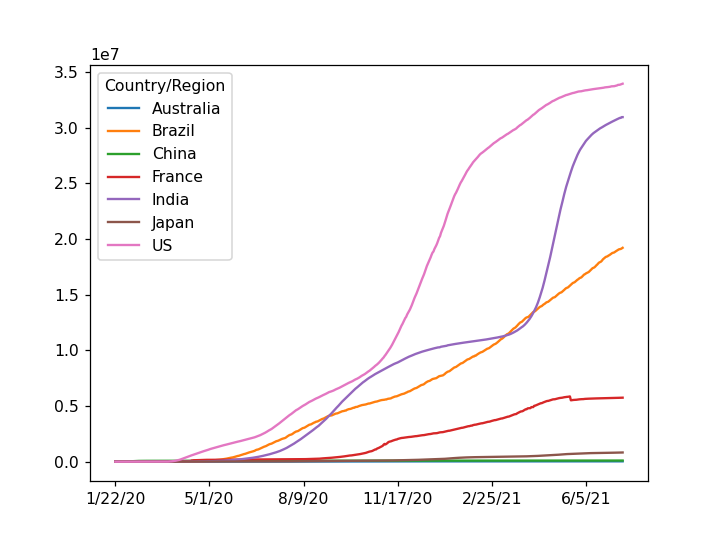

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Australia,-256.850200,1130.843900,0,0,0,0,4,5,5,6,...,30831,30861,30903,30951,31015,31100,31221,31323,31429,31513
Brazil,-14.235000,-51.925300,0,0,0,0,0,0,0,0,...,18792511,18855015,18909037,18962762,19020499,19069003,19089940,19106971,19151993,19209729
China,1085.292300,3688.937700,548,643,920,1406,2075,2877,5509,6087,...,103890,103948,103966,103992,104019,104020,104072,104101,104126,104157
France,46.227600,2.213700,0,0,2,3,3,3,4,5,...,5718270,5720593,5724395,5728837,5733214,5737910,5742166,5742783,5749593,5749593
India,20.593684,78.962880,0,0,0,0,0,0,0,0,...,30619932,30663665,30709557,30752950,30795716,30837222,30874376,30874376,30946147,30946074
Japan,36.204824,138.252924,2,2,2,2,4,4,7,7,...,808220,809909,812089,814319,816593,819051,821083,822594,824990,828201
US,40.000000,-100.000000,1,1,2,2,5,5,5,6,...,33723289,33747513,33770444,33790505,33838746,33847784,33853948,33888961,33915385,33947230


In [5]:
data = pd.read_csv('https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv')

country = ['Australia', 'Brazil', 'China', 'France', 'India', 'Japan', 'US']
drop_index = data[data['Country/Region'] == 'France'].iloc[:-1].index.union(data[data['Country/Region'] == 'Netherlands'].iloc[:-1].index).union(data[data['Country/Region'] == 'New Zealand'].iloc[:-1].index).union(data[data['Country/Region'] == 'United Kingdom'].iloc[:-1].index).union(data[data['Country/Region'] == 'Denmark'].iloc[:-1].index)
new = data.drop(drop_index)
new.groupby(new['Country/Region']).sum().loc[country].T.iloc[2:].plot()
new.groupby(new['Country/Region']).sum().loc[country]